<h1>Quiz 1 : Pemahaman</h1>

1. Sebutkan apa saja kira2 preprocessing Data?
2. Jelaskan beberapa cara imputing missing value?
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?



1.   Preprocessing data terbagi atas filling data, seperti filling pada missing value, namun jika data terlalu banyak missing, bisa dilakukan dengan drop column tersebut agar tidak mengganggu data untuk di train maupun di test. Lalu untuk data categorical, jika kategori berbentuk string/object bisa ubah ke bentuk biner atau dengan melakukan encoding. Untuk data yang ordinal, bisa dengan menggunakan nilai lebih tinggi sebagai sistem perangkingan data mana yang memiliki derajat lebih besar. Lalu setelahnya, bisa dengan melakukan, feature weighing atau mengukur tingkat kepentingan fitur, jika fitur tidak terlalu penting dan memiliki varians yang kecil, maka lebih baik untuk di drop karena hanya akan memakan daya komputasi tanpa memberikan dampak signifikan. Setelahnya adalah dengan memastikan data tersebut memiliki tipe data yang sesuai dan bisa di proses oleh algoritma machine learning, dan bisa di plot.


2.   Beberapa cara input dari missing value antara lain seperti menggunakan **mean/median** untuk mengisi dengan cara melakukan replace, namun cara ini tidak terlalu akurat dan bisa dilakukan hanya pada data bertipe numerik. Lalu cara lainnya adalah dengan melakukan pengisian dengan **modus** untuk data yang bertipe kategorikal, lalu bisa juga dengan **bfill/ffill** yang menginput missing value dengan data di depan atau di belakangnya, lalu yang terakhir adalah **KNNInputer** yang melakukan inputting missing value dengan algoritma KNN dan melihat data-data neighbournya. Untuk metode mengisi, kecuali KNN dapat dilakukan dengan replace ataupun *fillna*, kalau untuk KNN sendiri memiliki library tersendiri yang disebut sebagai KNNImputer dari sklearn.Imputer


3.  Feature centering dan scaling perlu dilakukan ketika data kita memiliki jarak sangat besar sehingga data tidak terbagi secara merata bersamaan dengan feature-feature lainnya. Hal ini akan mempersulit algoritma klasifikasi/regresi terutama jika data tersebut berbentuk angka kontinu, yang lalu perlu diperhatikan juga hal ini akan mencegah data outliers mengganggu nilai dari feature yang telah dimiliki, oleh karena itu Scaling dan Centering sangatlah penting


4.  Tahap-tahap pada machine learning dasarnya adalah 


**(1) EDA (Exploratory Data Analysis)** Yang bertujuan untuk melakukan analisa awal mengenai data dan melihat kualitas data


**(2) Data Preprocessing dan Data Cleaning** dimana pada tahap ini data diolah lebih lanjut sehingga bisa dipakai dalam pengembangan ML 


**(3) Model Selection** Di mana pada bagian ini adalah untuk memilih model yang akan dipakai nantinya, serta optimasi hyperparameter dari model tersebut.


**(4) Model Evaluation** yaitu melakukan evaluasi terhadap model dengan melihat performanya terhadap data testing


**(5) Deployment** Setelah model di evaluasi, maka selanjutnya akan siap ke tahap produksi


**(6) Monitoring** Model yang telah dipakai dalam tahap produksi masih harus tetap dimonitor untuk menjaga kualitasnya. Pada tahap produksi model bisa saja menemukan data yang tidak dikenali sehingga performa model dapat turun.





<h1>Quiz 2 : Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data titanic.csv sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data titanic_test.csv untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![image.png](attachment:image.png)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer 
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import NuSVC

In [0]:
df_gender_submission = pd.read_csv('gender_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [0]:
df_test = pd.merge(df_test, df_gender_submission, how='inner', on='PassengerId')

In [33]:
print(df_train.info())
print()
print(df_train['Ticket'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

1601                7
347082              7
CA. 2343            7
347088              6
CA 2144             6
                   ..
28206               1
250652              1
347071              1
SOTON/OQ 3101316    1
19972             

In [34]:
print(df_test.info())
print()
print(df_train['Ticket'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB
None

1601                7
347082              7
CA. 2343            7
347088              6
CA 2144             6
                   ..
28206               1
250652              1
347071              1
SOTON/OQ 3101316    1
19972             

In [0]:
df_train = df_train.drop(['Cabin', 'Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [36]:
print(df_train.head())
print()
print(df_test.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0          892       3    male  34.5      0      0   7.8292        Q         0
1          893       3  female  47.0      1      0   7.0000        S         1
2          894       2    male  62.0      0      0   9.6875        Q         0
3          895       3    male  27.0      0      0   8.6625        S         0
4          896       3  female  22.0      1      1  12.2875        S         1


In [0]:
imputer = KNNImputer(n_neighbors=4)

In [0]:
bool_series = pd.isnull(df_train["Age"])
bool_series_test = pd.isnull(df_test["Age"])
null_idx_train = df_train[bool_series].index
null_idx_test = df_test[bool_series_test].index

In [14]:
print(df_train.loc[null_idx_train])

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5              6         0       3    male  NaN      0      0   8.4583        Q
17            18         1       2    male  NaN      0      0  13.0000        S
19            20         1       3  female  NaN      0      0   7.2250        C
26            27         0       3    male  NaN      0      0   7.2250        C
28            29         1       3  female  NaN      0      0   7.8792        Q
..           ...       ...     ...     ...  ...    ...    ...      ...      ...
859          860         0       3    male  NaN      0      0   7.2292        C
863          864         0       3  female  NaN      8      2  69.5500        S
868          869         0       3    male  NaN      0      0   9.5000        S
878          879         0       3    male  NaN      0      0   7.8958        S
888          889         0       3  female  NaN      1      2  23.4500        S

[177 rows x 9 columns]


In [0]:
df_train[['Age', 'Survived']] = imputer.fit_transform(df_train[['Age', 'Survived']])
df_test[['Age', 'Survived', 'Fare']] = imputer.fit_transform(df_test[['Age', 'Survived', 'Fare']])

df_train[['Survived', 'Age']] = df_train[['Survived', 'Age']].astype('int32')
df_test[['Survived', 'Age']] = df_test[['Survived', 'Age']].astype('int32') 

In [40]:
print(df_train.loc[null_idx_train])
print()
print(df_test.loc[null_idx_test])

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5              6         0       3    male   29      0      0   8.4583        Q
17            18         1       2    male   29      0      0  13.0000        S
19            20         1       3  female   29      0      0   7.2250        C
26            27         0       3    male   29      0      0   7.2250        C
28            29         1       3  female   29      0      0   7.8792        Q
..           ...       ...     ...     ...  ...    ...    ...      ...      ...
859          860         0       3    male   29      0      0   7.2292        C
863          864         0       3  female   29      8      2  69.5500        S
868          869         0       3    male   29      0      0   9.5000        S
878          879         0       3    male   29      0      0   7.8958        S
888          889         0       3  female   29      1      2  23.4500        S

[177 rows x 9 columns]

     PassengerI

In [0]:
df_train['Embarked'] = df_train['Embarked'].fillna(method='ffill')

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


In [0]:
df_train = df_train.replace({'male' : 0, 'female': 1})
df_test = df_test.replace({'male' : 0, 'female': 1})

df_train['Embarked'] = pd.get_dummies(df_train['Embarked'])
df_test['Embarked'] = pd.get_dummies(df_test['Embarked'])

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,0
1,2,1,1,1,38,1,0,71.2833,1
2,3,1,3,1,26,0,0,7.9250,0
3,4,1,1,1,35,1,0,53.1000,0
4,5,0,3,0,35,0,0,8.0500,0


In [0]:
X_train = df_train.drop(['Survived', 'PassengerId'], axis = 1)
X_test = df_test.drop(['Survived', 'PassengerId'], axis = 1)
y_train = df_train[['Survived', 'PassengerId']]
y_test = df_test[['Survived', 'PassengerId']]

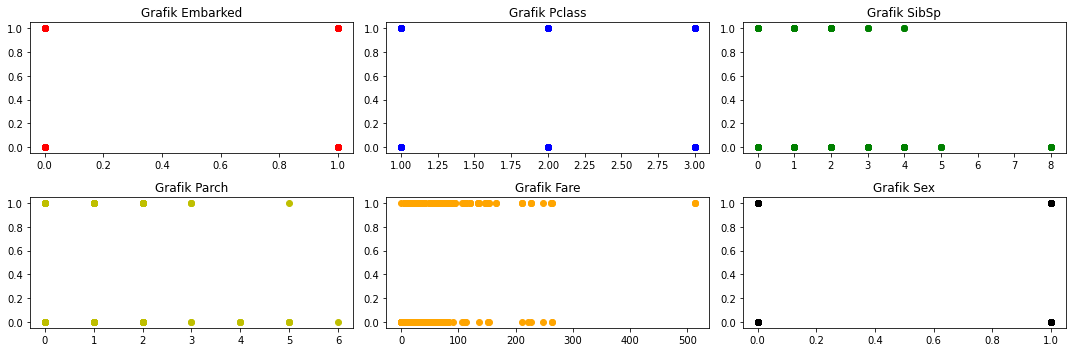

In [22]:
fig, ax = plt.subplots(ncols = 3, nrows=2, figsize=(15,5))
ax[0][0].scatter(X_train['Embarked'], y_train['Survived'], c='r')
ax[0][1].scatter(X_train['Pclass'], y_train['Survived'], c='b')
ax[0][2].scatter(X_train['SibSp'], y_train['Survived'], c='g')
ax[1][0].scatter(X_train['Parch'], y_train['Survived'], c='y')
ax[1][1].scatter(X_train['Fare'], y_train['Survived'], c='orange')
ax[1][2].scatter(X_train['Sex'], y_train['Survived'], c='black')

ax[0][0].set_title('Grafik Embarked')
ax[0][1].set_title('Grafik Pclass')
ax[0][2].set_title('Grafik SibSp')
ax[1][0].set_title('Grafik Parch')
ax[1][1].set_title('Grafik Fare')
ax[1][2].set_title('Grafik Sex')

plt.tight_layout()

plt.show()

In [23]:
X_train.shape

(891, 7)

In [24]:
svc = NuSVC()

parameters = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'degree' : np.arange(3, 30)}
rscv = RandomizedSearchCV(svc, parameters, n_iter=4, scoring='accuracy', cv=5) # Atau GridSearch
rscv.fit(X_train, y_train['Survived'])

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=NuSVC(break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=3,
                                   gamma='scale', kernel='rbf', max_iter=-1,
                                   nu=0.5, probability=False, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=4, n_jobs=None,
                   param_distributions={'degree': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy'

In [25]:
print(rscv.best_params_)
print(rscv.best_score_)

{'kernel': 'linear', 'degree': 10}
0.7878601468834348


In [0]:
svc = NuSVC(kernel='linear', degree=10)
svc.fit(X_train, y_train['Survived'])
y_pred = svc.predict(X_test)

In [28]:
print(accuracy_score(y_test['Survived'], y_pred))
print(classification_report(y_test['Survived'], y_pred))
print(confusion_matrix(y_test['Survived'], y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

[[266   0]
 [  0 152]]


In [29]:
submission = pd.DataFrame({'PassengerId':y_test['PassengerId'],'Survived':y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
from google.colab import files
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)
files.download(filename)